#### Template Notebook:
* Please change this notebook name as "Lastname_Firstname_FinalExam.ipynb"
* You can add/delete/modify the cells accordingly
* Please make sure your print your outputs in each question
* Try to attempt all the questions for partial credits

####  Libraries

In [108]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#### Question  1: Increasing Training Set Size Experiment 

In [109]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [110]:
# Load iris dataset
iris = datasets.load_iris()

In [111]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [112]:
iris_data.shape

(150, 4)

In [113]:
print(iris_data.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [114]:
X = iris.data
y = iris.target

### Divide the data into 80% training and 20% testing.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### From the training set only take 5% of the data and train the supervised learning models (Logistic Regression, Decision Trees, Random Forest, and Naive Bayes) and test it on the test set created in the previous step.

In [116]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

reduced_size = int(0.05 * len(X_train))
X_train_1 = X_train[:reduced_size]
y_train_1 = y_train[:reduced_size]

for name, model in models.items():
    model.fit(X_train_1, y_train_1)
    
results = {}
    
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


for name, accuracy in results.items():
    print(name,": Accuracy = ", accuracy)

Logistic Regression : Accuracy =  0.7333333333333333
Naive Bayes : Accuracy =  0.3333333333333333
Decision Tree : Accuracy =  1.0
Random Forest : Accuracy =  0.7


### Repeat the training again with adding 5% training data every time until you use the whole training set.

In [117]:
for split in range(5, 101, 5):
    X_train_2 = X_train[:int(len(X_train) * split / 100)]
    y_train_2 = y_train[:int(len(y_train) * split / 100)]
    
    for name, model in models.items():
        model.fit(X_train_2, y_train_2)

### In every training, test your models on the 20% of the test set and store the accuracy and f1-score of the model.

In [118]:
metrics = {name: {"accuracy": [], "f1_score": []} for name in models}

test_20 = int(0.2 * len(X_test))
X_test_3 = X_test[:test_20]
y_test_3 = y_test[:test_20]

for split in range(5, 101, 5):
    print("Training data size - ", split)
    X_train_2 = X_train[:int(len(X_train) * split / 100)]
    y_train_2 = y_train[:int(len(y_train) * split / 100)]
    
    for name, model in models.items():
        model.fit(X_train_2, y_train_2)
        
        y_pred = model.predict(X_test_3)
        accuracy = accuracy_score(y_test_3, y_pred)
        f1 = f1_score(y_test_3, y_pred, average='weighted')
        print(name,"\nAccuracy - ",accuracy, "\nf1 score - ", f1)
        print("\n")
        metrics[name]["accuracy"].append(accuracy)
        metrics[name]["f1_score"].append(f1)
    print("----------------------------------")
        
        

Training data size -  5
Logistic Regression 
Accuracy -  0.6666666666666666 
f1 score -  0.6666666666666666


Naive Bayes 
Accuracy -  0.3333333333333333 
f1 score -  0.16666666666666666


Decision Tree 
Accuracy -  0.8333333333333334 
f1 score -  0.8444444444444446


Random Forest 
Accuracy -  0.6666666666666666 
f1 score -  0.6666666666666666


----------------------------------
Training data size -  10
Logistic Regression 
Accuracy -  0.8333333333333334 
f1 score -  0.7619047619047619


Naive Bayes 
Accuracy -  0.8333333333333334 
f1 score -  0.7666666666666666


Decision Tree 
Accuracy -  0.8333333333333334 
f1 score -  0.8444444444444446


Random Forest 
Accuracy -  0.8333333333333334 
f1 score -  0.8444444444444446


----------------------------------
Training data size -  15
Logistic Regression 
Accuracy -  1.0 
f1 score -  1.0


Naive Bayes 
Accuracy -  0.8333333333333334 
f1 score -  0.7619047619047619


Decision Tree 
Accuracy -  1.0 
f1 score -  1.0


Random Forest 
Accuracy

### Plot the sample graph for accuracy and f1-score as provided below### 

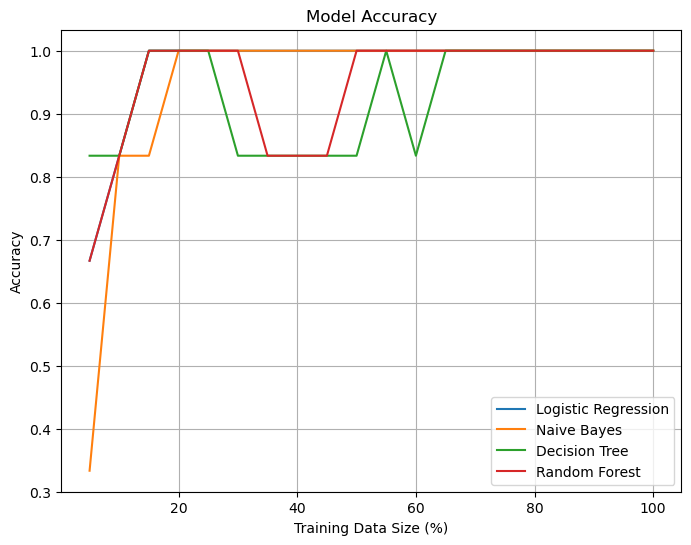

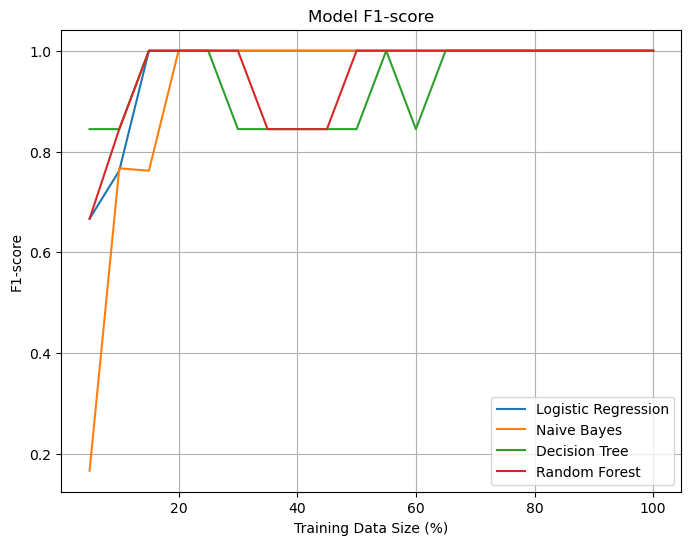

In [119]:
plt.figure(figsize=(8, 6))
for name, scores in metrics.items():
    plt.plot(range(5, 101, 5), scores["accuracy"],label=name)
plt.title('Model Accuracy')
plt.xlabel('Training Data Size (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for name, scores in metrics.items():
    plt.plot(range(5, 101, 5), scores["f1_score"],  label=name)
plt.title('Model F1-score')
plt.xlabel('Training Data Size (%)')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

#### Question 2: Binary Classification with Discriminant

In [120]:
X = np.array([5, 1, 9, 6, 5, 6, 1, 9, 10, 11, 8, 7, 13, 8, 19])
Y = np.array([14, 16, 17, 10, 9, 17, 15, 3, 3, 1, 4, 5, 1, 3, 15])
len(X), len(Y)

(15, 15)

In [121]:
C = np.array(['c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2', 'c2'])

In [122]:
# Discriminant function
def discriminant_function(x, y):
    return -x + 2 * y + x * y

In [123]:
# Predicted labels based on the discriminant function
predicted_labels = np.where(discriminant_function(X, Y) >= 35, 'c1', 'c2')

In [124]:
# Calculate accuracy and number of misclassified points for each class
misclassified_c1 = np.sum((C == 'c1') & (predicted_labels != 'c1'))
misclassified_c2 = np.sum((C == 'c2') & (predicted_labels != 'c2'))

In [125]:
accuracy_c1 = 1 - misclassified_c1 / np.sum(C == 'c1')
accuracy_c2 = 1 - misclassified_c2 / np.sum(C == 'c2')

In [126]:
print("Number of misclassified in c1:", misclassified_c1)
print("Number of misclassified in c2:", misclassified_c2)
print("Accuracy for c1:", accuracy_c1)
print("Accuracy for c2:", accuracy_c2)

Number of misclassified in c1: 0
Number of misclassified in c2: 2
Accuracy for c1: 1.0
Accuracy for c2: 0.75


#### Question 3: K-Means Clustering

In [127]:
data_dict = {(2.0, 3.43, 4.37):2, (2.49, 4.28, 4.83):2, (2.58, 4.36, 4.48):2, (2.66, 4.45, 5.95):2, 
(2.82, 3.66, 4.51): 2, (3.03, 4.37, 5.07): 2, (3.27, 4.54, 4.57): 2, (3.41, 3.94, 5.35): 2, 
(3.53, 4.32, 5.41): 2, (3.53, 4.6, 6.8): 1, (3.61, 4.25, 5.21): 1, (3.61, 4.78, 5.47): 1, 
(3.72, 5.44, 5.88): 1, (3.87, 4.96, 4.52): 2, (4.13, 5.29, 6.6): 1, (4.25, 5.97, 5.48): 1, 
(4.61, 4.9, 5.11): 1, (4.73, 4.4, 6.78): 1, (4.97, 4.25, 5.0): 1, (4.98, 5.27, 6.79): 1, 
(5.08, 3.51, 4.69): 3, (5.15, 3.58, 4.2): 3, (5.67, 2.27, 4.65): 3, (5.67, 3.81, 5.75): 3, 
(5.94, 2.34, 4.12): 3, (6.06, 3.16, 4.36): 3, (6.09, 3.19, 4.02): 3, (6.43, 3.42, 4.18): 3, 
(6.56, 2.7, 4.03): 3, (6.79, 3.46, 4.81): 3}

In [128]:
for key, value in data_dict.items():
    print(key,value)

(2.0, 3.43, 4.37) 2
(2.49, 4.28, 4.83) 2
(2.58, 4.36, 4.48) 2
(2.66, 4.45, 5.95) 2
(2.82, 3.66, 4.51) 2
(3.03, 4.37, 5.07) 2
(3.27, 4.54, 4.57) 2
(3.41, 3.94, 5.35) 2
(3.53, 4.32, 5.41) 2
(3.53, 4.6, 6.8) 1
(3.61, 4.25, 5.21) 1
(3.61, 4.78, 5.47) 1
(3.72, 5.44, 5.88) 1
(3.87, 4.96, 4.52) 2
(4.13, 5.29, 6.6) 1
(4.25, 5.97, 5.48) 1
(4.61, 4.9, 5.11) 1
(4.73, 4.4, 6.78) 1
(4.97, 4.25, 5.0) 1
(4.98, 5.27, 6.79) 1
(5.08, 3.51, 4.69) 3
(5.15, 3.58, 4.2) 3
(5.67, 2.27, 4.65) 3
(5.67, 3.81, 5.75) 3
(5.94, 2.34, 4.12) 3
(6.06, 3.16, 4.36) 3
(6.09, 3.19, 4.02) 3
(6.43, 3.42, 4.18) 3
(6.56, 2.7, 4.03) 3
(6.79, 3.46, 4.81) 3


In [129]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [130]:
center_dict = {(3,4,5):1, (4,5,6):2, (6,3,5):3}

p_values = [1, 2, 3]

In [131]:
data_points = list(data_dict.keys())
true_labels = list(data_dict.values())

for p in p_values:
    kmeans = KMeans(n_clusters=len(center_dict), init=np.array(list(center_dict.keys())), n_init=1, random_state=0)
    kmeans.fit(data_points)
    cluster_centers = kmeans.cluster_centers_

    correct_classifications = 0

    for i, point in enumerate(data_points):
        min_dist = float('inf')
        predicted_label = None

        for center, true_label in center_dict.items():
            dist = distance.minkowski(point, center, p)
            if dist < min_dist:
                min_distance = dist
                predicted_label = true_label

        if predicted_label == true_labels[i]:
            correct_classifications += 1

    print("p:",p," -> Number of Correctly Classified Instances = ",correct_classifications)


p: 1  -> Number of Correctly Classified Instances =  10
p: 2  -> Number of Correctly Classified Instances =  10
p: 3  -> Number of Correctly Classified Instances =  10
